In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import data_table
# from google.colab import drive

Matplotlib is building the font cache; this may take a moment.


In [3]:
# #mount google drive to read data
# dataFile = 'Officer_Traffic_Stops.csv'


# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/DSBA6156_project/'+ dataFile
# traffic_stops_df = pd.read_csv(path,sep=",",encoding='ISO-8859-1')
# drive.flush_and_unmount()

traffic_stops_df = pd.read_csv('Officer_Traffic_Stops.csv')


In [4]:
traffic_stops_df.head()

,OBJECTID,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,GlobalID
0,1,2019/11,Speeding,White,Male,12.0,Asian,Non-Hispanic,Female,39,NO,Citation Issued,South Division,{A45CF4CD-282F-4030-A160-72773A3B4730}
1,2,2019/11,Speeding,White,Male,21.0,White,Non-Hispanic,Female,24,NO,Citation Issued,Independence Division,{B03798C2-6FB5-4ED5-A15C-1BCBDA3C27D5}
2,3,2019/11,Speeding,Asian / Pacific Islander,Male,11.0,White,Non-Hispanic,Male,27,NO,Citation Issued,Independence Division,{AB78EFFB-CB43-4488-B244-6E845DB18222}
3,4,2019/11,Speeding,White,Male,13.0,Black,Non-Hispanic,Female,20,NO,Citation Issued,University City Division,{1BF01CA7-E08A-4C3A-8FDD-2EF1A1AEB2D0}
4,5,2019/11,Vehicle Regulatory,White,Male,22.0,White,Non-Hispanic,Female,33,NO,Citation Issued,Independence Division,{7EEB79D4-2FF9-48F7-AC4B-4FC5F8A13EF8}


In [5]:
# Display basic information about the dataset
print(traffic_stops_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809972 entries, 0 to 809971
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBJECTID                  809972 non-null  int64  
 1   Month_of_Stop             809972 non-null  object 
 2   Reason_for_Stop           809972 non-null  object 
 3   Officer_Race              809970 non-null  object 
 4   Officer_Gender            809970 non-null  object 
 5   Officer_Years_of_Service  809970 non-null  float64
 6   Driver_Race               809972 non-null  object 
 7   Driver_Ethnicity          809972 non-null  object 
 8   Driver_Gender             809972 non-null  object 
 9   Driver_Age                809972 non-null  int64  
 10  Was_a_Search_Conducted    809972 non-null  object 
 11  Result_of_Stop            809972 non-null  object 
 12  CMPD_Division             733202 non-null  object 
 13  GlobalID                  809972 non-null  o

In [6]:
# Convert 'Month_of_Stop' to datetime object
traffic_stops_df['Month_of_Stop'] = pd.to_datetime(traffic_stops_df['Month_of_Stop'], format='%Y/%m')

In [7]:
# Convert 'Was_a_Search_Conducted' to boolean
traffic_stops_df['Was_a_Search_Conducted'] = traffic_stops_df['Was_a_Search_Conducted'].apply(lambda x: True if x == 'YES' else False)

In [8]:
# Display class counts for categorical variables
categorical_cols = ['Reason_for_Stop', 'Officer_Race', 'Officer_Gender', 'Driver_Race', 'Driver_Ethnicity', 'Driver_Gender', 'Result_of_Stop', 'CMPD_Division']

for col in categorical_cols:
    print(f"\nClass Counts for {col}:")
    print(traffic_stops_df[col].value_counts())


Class Counts for Reason_for_Stop:
Reason_for_Stop
Vehicle Regulatory           293575
Speeding                     251314
Vehicle Equipment             89552
Stop Light/Sign               77294
Safe Movement                 52566
Investigation                 18673
Other                         16944
SeatBelt                       7312
CheckPoint                     1559
Driving While Impaired         1183
Name: count, dtype: int64

Class Counts for Officer_Race:
Officer_Race
White                             574074
Black/African American            120544
Asian / Pacific Islander           50072
Hispanic/Latino                    37718
2 or More                          18670
Not Specified                       5872
American Indian/Alaska Native       2755
Native Hawaiian/Oth Pac Island       265
Name: count, dtype: int64

Class Counts for Officer_Gender:
Officer_Gender
Male      745353
Female     64617
Name: count, dtype: int64

Class Counts for Driver_Race:
Driver_Race
Black       

In [8]:
# 1. Handling Missing Data
# Check for missing values
missing_values = traffic_stops_df.isna().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 ï»¿OBJECTID                     0
Month_of_Stop                   0
Reason_for_Stop                 0
Officer_Race                    2
Officer_Gender                  2
Officer_Years_of_Service        2
Driver_Race                     0
Driver_Ethnicity                0
Driver_Gender                   0
Driver_Age                      0
Was_a_Search_Conducted          0
Result_of_Stop                  0
CMPD_Division               76770
GlobalID                        0
dtype: int64


In [9]:
# Fill missing categorical columns with 'Unknown'
traffic_stops_df[categorical_cols] = traffic_stops_df[categorical_cols].fillna('Unknown')

In [10]:
# Fill missing numerical columns with median
numerical_cols = ['Officer_Years_of_Service', 'Driver_Age']
for col in numerical_cols:
    traffic_stops_df[col].fillna(traffic_stops_df[col].median(), inplace=True)

<ipython-input-10-96e949e74cd0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_stops_df[col].fillna(traffic_stops_df[col].median(), inplace=True)


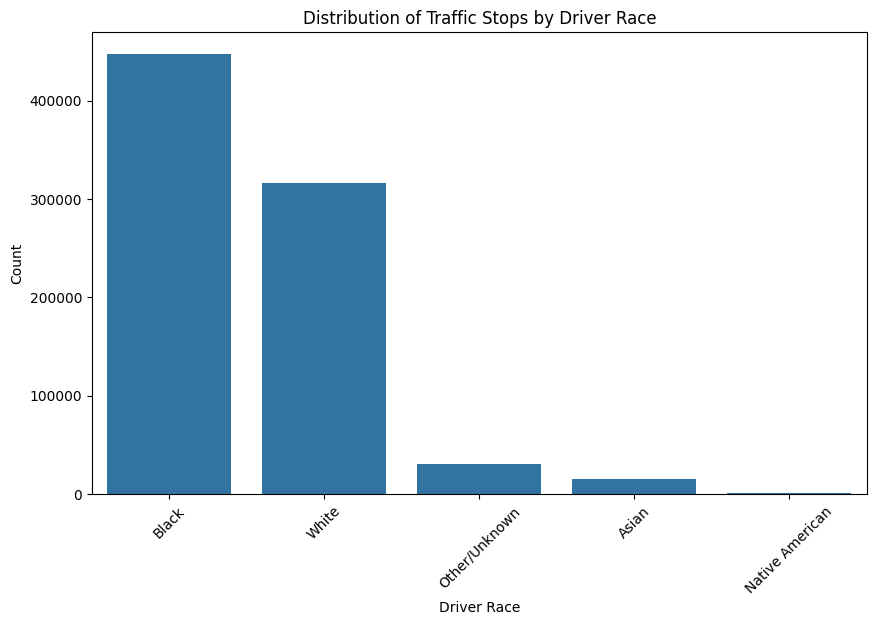

In [11]:
# 2. Exploratory Data Analysis (EDA)
# Plot distribution of traffic stops by Driver Race
plt.figure(figsize=(10, 6))
sns.countplot(data=traffic_stops_df, x='Driver_Race', order=traffic_stops_df['Driver_Race'].value_counts().index)
plt.title('Distribution of Traffic Stops by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

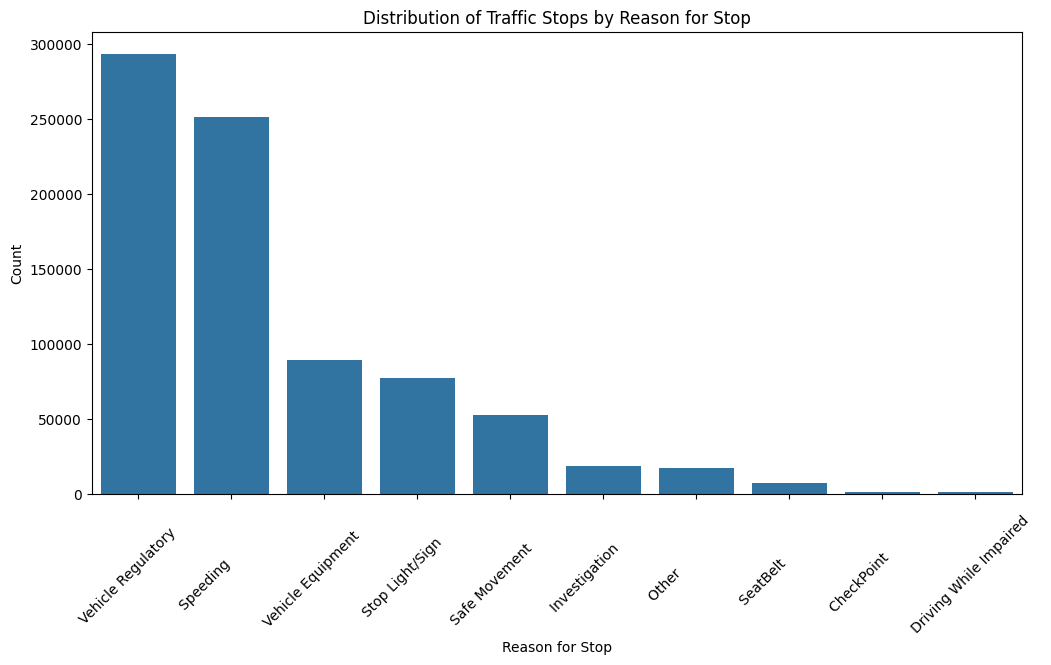

In [12]:
# Plot distribution of traffic stops by Reason for Stop
plt.figure(figsize=(12, 6))
sns.countplot(data=traffic_stops_df, x='Reason_for_Stop', order=traffic_stops_df['Reason_for_Stop'].value_counts().index)
plt.title('Distribution of Traffic Stops by Reason for Stop')
plt.xlabel('Reason for Stop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# # Plot class balance for the target variable
# plt.figure(figsize=(8, 5))
# sns.countplot(x=y, palette='viridis')
# plt.title('Class Balance for Target Variable')
# plt.xlabel('Was a Search Conducted (0 = No, 1 = Yes)')
# plt.ylabel('Count')
# plt.show()

In [14]:
# 3. Classification Model Preparation
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [15]:
# Encode categorical features
encoder = LabelEncoder()
categorical_features = ['Reason_for_Stop', 'Officer_Race', 'Officer_Gender', 'Driver_Race', 'Driver_Ethnicity', 'Driver_Gender', 'CMPD_Division']
for feature in categorical_features:
    traffic_stops_df[feature] = encoder.fit_transform(traffic_stops_df[feature])

In [16]:
# Prepare features and target for classification
X = traffic_stops_df[['Reason_for_Stop', 'Officer_Race', 'Officer_Gender', 'Officer_Years_of_Service',
                      'Driver_Race', 'Driver_Ethnicity', 'Driver_Gender', 'Driver_Age', 'CMPD_Division']]
y = traffic_stops_df['Was_a_Search_Conducted'].astype(int)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [20]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    231090
           1       0.27      0.09      0.13     11902

    accuracy                           0.94    242992
   macro avg       0.61      0.54      0.55    242992
weighted avg       0.92      0.94      0.93    242992




Feature Importances:

                    Feature  Importance
7                Driver_Age    0.324749
3  Officer_Years_of_Service    0.236916
8             CMPD_Division    0.183463
0           Reason_for_Stop    0.110931
1              Officer_Race    0.058894
4               Driver_Race    0.030785
6             Driver_Gender    0.024480
2            Officer_Gender    0.018775
5          Driver_Ethnicity    0.011006


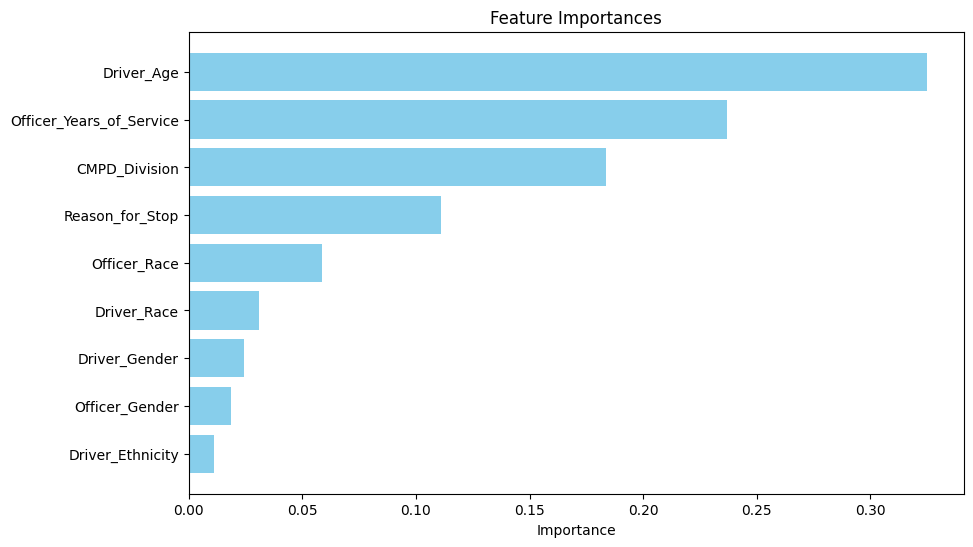

In [21]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

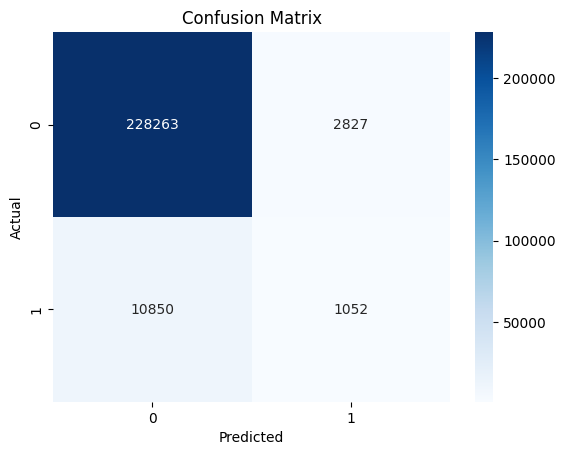

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC Score: 0.76


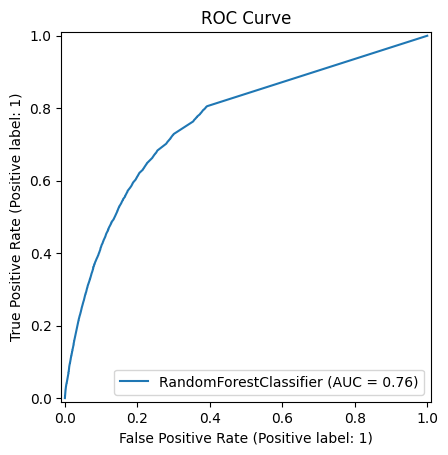

In [23]:
# AUC Score and ROC Curve
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nAUC Score: {auc_score:.2f}")

RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test)
plt.title('ROC Curve')
plt.show()

<ipython-input-24-312f65a6cce0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='viridis')


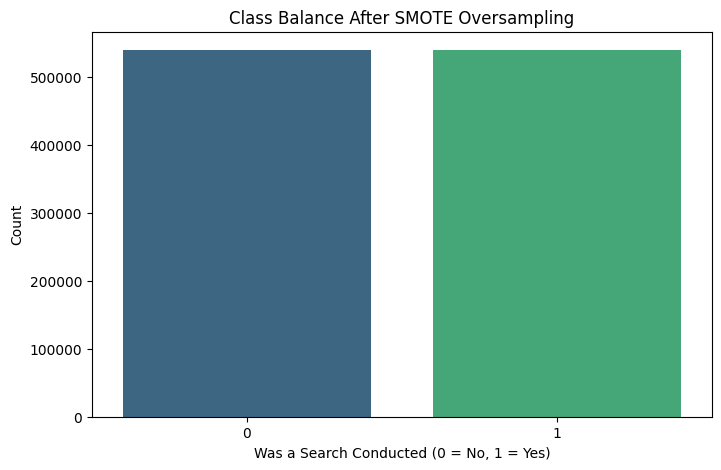

In [24]:
# Use SMOTE to oversample and balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot class balance after oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title('Class Balance After SMOTE Oversampling')
plt.xlabel('Was a Search Conducted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [25]:
# Perform GridSearchCV to find the best hyperparameters for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='auc', random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Train the best XGBoost Classifier
best_xgb_classifier = grid_search.best_estimator_
print("\nBest Parameters from GridSearchCV:\n", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters from GridSearchCV:
 {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.8}


In [26]:
# Make predictions
y_pred = best_xgb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:25:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:25:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [27]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    231090
           1       0.17      0.61      0.27     11902

    accuracy                           0.84    242992
   macro avg       0.57      0.73      0.59    242992
weighted avg       0.94      0.84      0.88    242992




Feature Importances:

                    Feature  Importance
3  Officer_Years_of_Service    0.222394
4               Driver_Race    0.153487
5          Driver_Ethnicity    0.139773
6             Driver_Gender    0.137126
0           Reason_for_Stop    0.114886
8             CMPD_Division    0.065206
1              Officer_Race    0.061336
7                Driver_Age    0.060487
2            Officer_Gender    0.045304


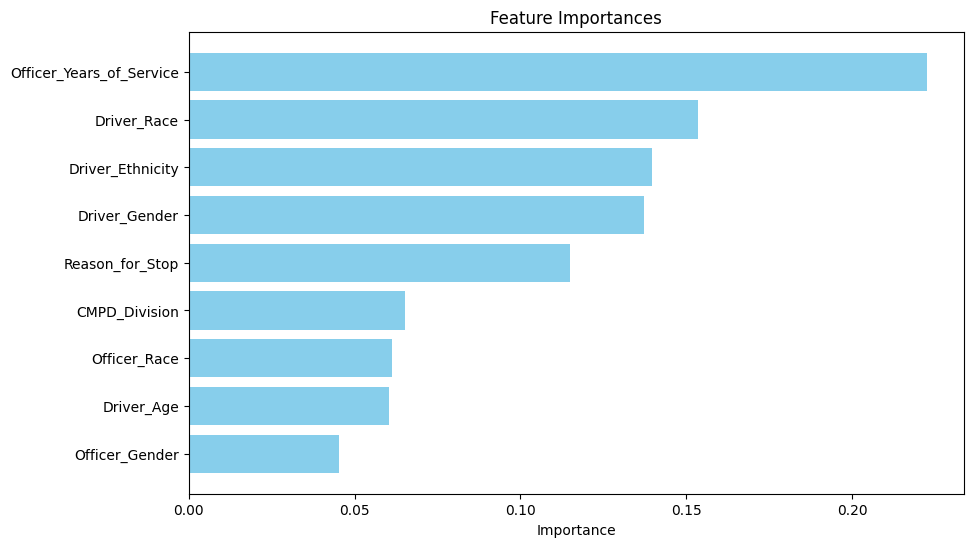

In [28]:
# Feature Importance
feature_importances = best_xgb_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


AUC Score: 0.83


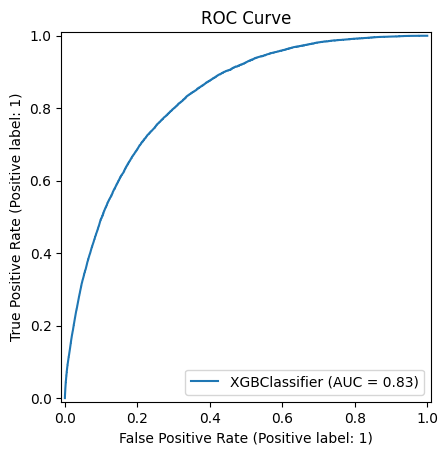

In [29]:
# AUC Score and ROC Curve
y_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nAUC Score: {auc_score:.2f}")

RocCurveDisplay.from_estimator(best_xgb_classifier, X_test, y_test)
plt.title('ROC Curve')
plt.show()